# Coronavirus (COVID-19) Cases, Deaths and Vaccination Data Visualisation

The purpose of this project is to practice data visualisation techniques for my personal development. 

---

The data used for this project was taken from the World Health Organization (WHO) website, which can be found at this [link](https://covid19.who.int/). The website provides access to data records that show the number of daily cases and deaths reported to the WHO globally, as well as the recorded vaccination data. The data used for this project was collected on 05/01/2022, and shows all current figures related to the Coronavirus at this time. 

---

In [1]:
import pandas as pd

# read dataset
data = pd.read_csv('data/WHO-COVID-19-global-data.csv')

# convert 'Date_reported' column to datetime object types
data['Date_reported'] = pd.to_datetime(data['Date_reported'])

# replace negative values with 0
data._get_numeric_data()[data._get_numeric_data() < 0] = 0

# isolate UK data
data_uk = data[data['Country'] == 'The United Kingdom']
data_uk.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
154874,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0
154875,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0
154876,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0
154877,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0
154878,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0


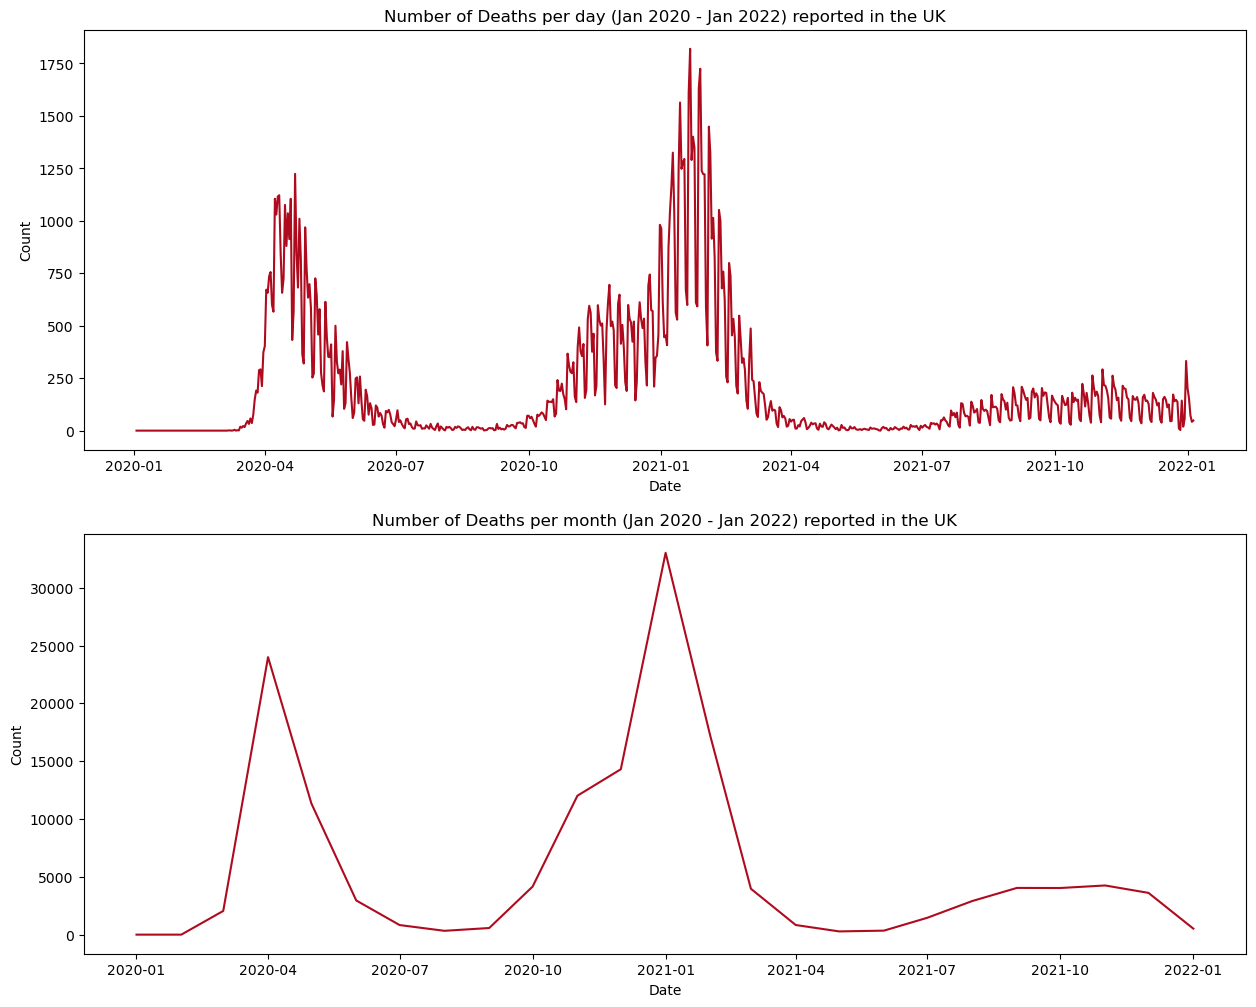

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(data_uk['Date_reported'], data_uk['New_deaths'], color='#af0b1e')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Deaths per day (Jan 2020 - Jan 2022) reported in the UK')

# create dataframe containing the total number of cases and deaths per month
data_uk_month_total = data_uk.copy()
data_uk_month_total['Date_reported'] = data_uk_month_total['Date_reported'].dt.strftime('%Y-%m')
data_uk_month_total = data_uk_month_total.groupby('Date_reported').sum()[['New_cases', 'New_deaths']]
data_uk_month_total.reset_index(level=0, inplace=True)
data_uk_month_total['Date_reported'] = pd.to_datetime(data_uk_month_total['Date_reported'])

plt.subplot(2,1,2)
plt.plot(data_uk_month_total['Date_reported'], data_uk_month_total['New_deaths'], color='#af0b1e')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Deaths per month (Jan 2020 - Jan 2022) reported in the UK')
plt.show()

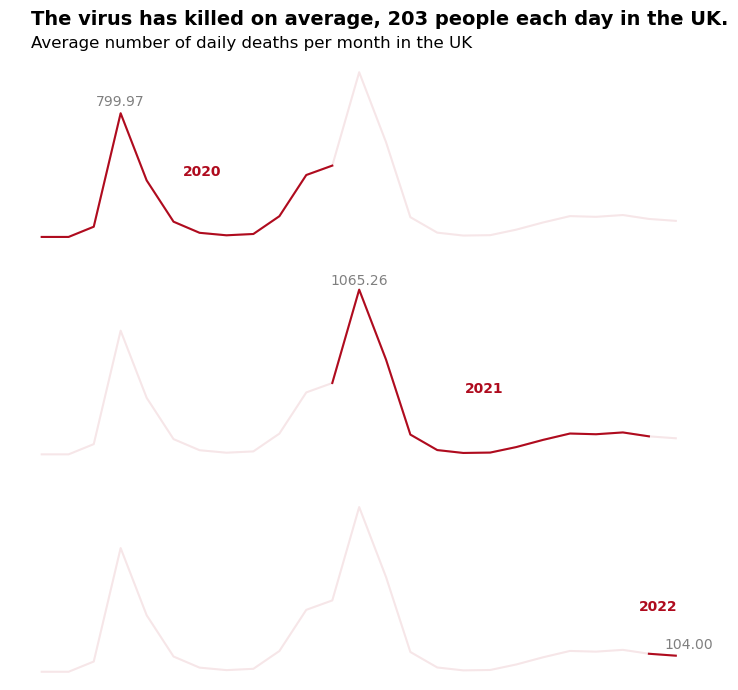

In [3]:
# create dataframe containing the average number of cases and deaths per month
data_uk_month_avg = data_uk.copy()
data_uk_month_avg['Date_reported'] = data_uk_month_avg['Date_reported'].dt.strftime('%Y-%m')
data_uk_month_avg = data_uk_month_avg.groupby('Date_reported').mean()[['New_cases', 'New_deaths']]
data_uk_month_avg.reset_index(level=0, inplace=True)
data_uk_month_avg['Date_reported'] = pd.to_datetime(data_uk_month_avg['Date_reported'])

# plot
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,8), nrows=3, ncols=1)
for ax in [ax1, ax2, ax3]:
    ax.plot(data_uk_month_avg['Date_reported'], data_uk_month_avg['New_deaths'], color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(data_uk_month_avg['Date_reported'][0:12], data_uk_month_avg['New_deaths'][0:12], color='#af0b1e')
ax1.text(18425, 400, '2020', color='#af0b1e', weight='bold')
ax1.text(18325, 850, '799.97', alpha=0.5)
ax1.text(18250, 1375, 'The virus has killed on average, 203 people each day in the UK.', size=14, weight='bold')
ax1.text(18250, 1225, 'Average number of daily deaths per month in the UK', size=12) 

ax2.plot(data_uk_month_avg['Date_reported'][11:24], data_uk_month_avg['New_deaths'][11:24], color='#af0b1e')
ax2.text(18750, 400, '2021', color='#af0b1e', weight='bold')
ax2.text(18595, 1100, '1065.26', alpha=0.5)

ax3.plot(data_uk_month_avg['Date_reported'][23:25], data_uk_month_avg['New_deaths'][23:25], color='#af0b1e')
ax3.text(18950, 400, '2022', color='#af0b1e', weight='bold')
ax3.text(18980, 150, '104.00', alpha=0.5)
plt.show()

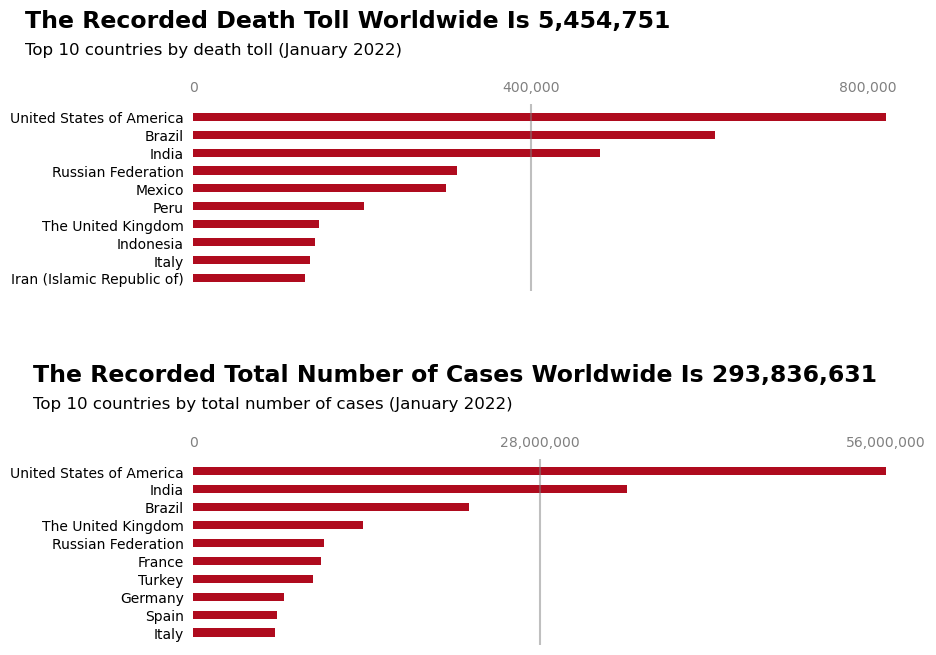

In [4]:
# top 10 countries with highest number of deaths
top_10_countries_deaths = pd.DataFrame(data.groupby('Country').sum()['New_deaths'].sort_values(ascending=False).head(10))
top_10_countries_deaths.reset_index(level=0, inplace=True)

# top 10 countries with highest number of cases
top_10_countries_cases = pd.DataFrame(data.groupby('Country').sum()['New_cases'].sort_values(ascending=False).head(10))
top_10_countries_cases.reset_index(level=0, inplace=True)

fig, (ax1, ax2) = plt.subplots(figsize=(8,6), nrows=2, ncols=1)
fig.tight_layout(h_pad=10)
for ax in [ax1, ax2]:
    ax.xaxis.tick_top()  # move x-axis to the top
    ax.tick_params(top=False, left=False)  # remove ticks
    ax.tick_params(axis='x', colors='grey')  # change colour of xtick labels
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.barh(top_10_countries_deaths.sort_values(by='New_deaths', ascending=True)['Country'], 
        top_10_countries_deaths.sort_values(by='New_deaths', ascending=True)['New_deaths'], 
        height=0.45, color='#af0b1e')
ax1.set_xticks([0, 400000, 800000])  # set xtick values
ax1.set_xticklabels(['0', '400,000', '800,000'])  # change xtick labels to add ','
ax1.axvline(x=400000, c='grey', alpha=0.5)  # add vertical line

ax2.barh(top_10_countries_cases.sort_values(by='New_cases', ascending=True)['Country'], 
         top_10_countries_cases.sort_values(by='New_cases', ascending=True)['New_cases'], 
         height=0.45, color='#af0b1e')
ax2.set_xticks([0, 28000000, 56000000])  # set xtick values
ax2.set_xticklabels(['0', '28,000,000', '56,000,000'])  # change xtick labels to add ','
ax2.axvline(x=28000000, c='grey', alpha=0.5)  # add vertical line

ax1.text(x=-200000, y=14, s='The Recorded Death Toll Worldwide Is 5,454,751', weight='bold', size=17)
ax1.text(x=-200000, y=12.5, s='Top 10 countries by death toll (January 2022)', size=12)
ax2.text(x=-13000000, y=14, s='The Recorded Total Number of Cases Worldwide Is 293,836,631', weight='bold', size=17)
ax2.text(x=-13000000, y=12.5, s='Top 10 countries by total number of cases (January 2022)', size=12)
plt.show()